In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("BU Athletics Data Set v.4.xlsx")

In [ ]:
df.head()

,Data Input Yr,Student,US Region,English Language,IPEDS Race Description,Athletic Code 1,Entering Term,Yr,FCLASS,RetentionClass,...,Semester GPI-13th Sem,Semester GPI-14th Sem,Semester GPI-15th Sem,Semester GPI-16th Sem,Semester GPI-17th Sem,Semester GPI-18th Sem,Semester GPI-19th Sem,Semester GPI-20th Sem,Semester GPI-21st Sem,Semester GPI-22nd Sem
0,2022,1,NaN,English,Non-Resident Alien,HC,Fall2020,U3,FRESHMEN,Freshmen,...,0,0,0,0,0,0,0,0,0,0
1,2021,2,Northeast,NaN,African American or Black,SC,Fall2017,U4,FRESHMEN,Freshmen,...,0,0,0,0,0,0,0,0,0,0
2,2022,3,West,NaN,White,MC,Fall2020,U2,FRESHMEN,Freshmen,...,0,0,0,0,0,0,0,0,0,0
3,2022,4,West,NaN,White,WS,Fall2018,U4,FRESHMEN,Freshmen,...,0,0,0,0,0,0,0,0,0,0
4,2021,5,Northeast,NaN,White,WC,Fall2017,U4,FRESHMEN,Freshmen,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(823, 67)

In [ ]:
# What is the range of BU GPA for student athletes

To calculate the range of BU GPA, we analysed the data in the ‘Last Cumulative BU GPA’ column. First we checked if there are any missing values in the column. There were no missing values. 2 students had ‘Last Cumulative BU GPA’ equal to 0. The next lowest value was 1.72 and the maximum value was 4.

In [ ]:
df['Last Cumulative BU GPA'].isna().any()

False

In [ ]:
df[df['Last Cumulative BU GPA'] == 0]

,Data Input Yr,Student,US Region,English Language,IPEDS Race Description,Athletic Code 1,Entering Term,Yr,FCLASS,RetentionClass,...,Semester GPI-13th Sem,Semester GPI-14th Sem,Semester GPI-15th Sem,Semester GPI-16th Sem,Semester GPI-17th Sem,Semester GPI-18th Sem,Semester GPI-19th Sem,Semester GPI-20th Sem,Semester GPI-21st Sem,Semester GPI-22nd Sem
444,2021.0,445.0,West,NaN,No Information,LR,Fall2020,U1,FRESHMEN,Freshmen,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547,2022.0,548.0,South,NaN,White,LW,Fall 2021,G2,Graduate Students,Transfers,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['Last Cumulative BU GPA'].sort_values()

444    0.00
547    0.00
71     1.72
366    1.79
321    1.81
       ... 
210    4.00
703    4.00
74     4.00
665    4.00
796    4.00
Name: Last Cumulative BU GPA, Length: 823, dtype: float64

In [ ]:
# Does the average student athlete improve their GPA throughout their college year?

We calculated the average of ‘Cumulative GPA’ of 22 semesters and plotted it.

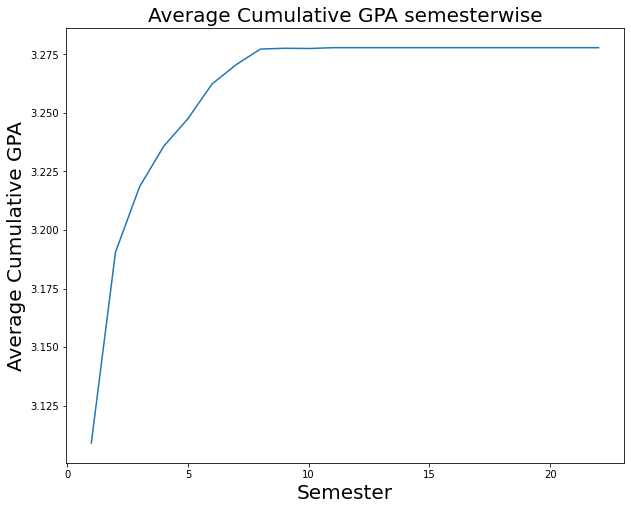

In [ ]:
cumulative_gpa_columns = ['Cumulative GPA-1st Sem', 'Cumulative GPA-2nd Sem', 'Cumulative GPA-3rd Sem',
                            'Cumulative GPA-4th Sem', 'Cumulative GPA-5th Sem', 'Cumulative GPA-6th Sem',
                            'Cumulative GPA-7th Sem', 'Cumulative GPA-8th Sem', 'Cumulative GPA-9th Sem',
                            'Cumulative GPA-10th Sem', 'Cumulative GPA-11th Sem', 'Cumulative GPA-12th Sem',
                            'Cumulative GPA-13th Sem', 'Cumulative GPA-14th Sem', 'Cumulative GPA-15th Sem',
                            'Cumulative GPA-16th Sem', 'Cumulative GPA-17th Sem', 'Cumulative GPA-18th Sem',
                            'Cumulative GPA-19th Sem', 'Cumulative GPA-20th Sem', 'Cumulative GPA-21st Sem',
                            'Cumulative GPA-22nd Sem']

cumulative_averages = []

for col in cumulative_gpa_columns:
    cumulative_averages.append(df[col].mean())

# Create a figure and axis object with specified figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data
ax.plot(range(1,23), cumulative_averages)

# Add labels and title
ax.set_xlabel('Semester', fontsize = 20)
ax.set_ylabel('Average Cumulative GPA', fontsize = 20)
ax.set_title('Average Cumulative GPA semesterwise', fontsize = 20)
plt.show()

From the above plot we can see that the average of cumulative GPAs have been increasing throughout the course of 22 semesters

But one issue is that certain students could have taken a break during any particular semester and their GPA for that particular semester would be 0. If we consider the students who have taken a break, then their cumulative GPA would remain the same for 2 consecutive semesters during which they had taken a break.

Suppose Student A's 'Cumulative GPA-12th Sem' = x and he has taken a break in the 13th sem. Then 'Cumulative GPA-13th Sem' is also equal to x. This is equivalent to student A scoring the same x GPA in the 13th semester. But Student A has only taken a break in the 13 semester.

So we drop all the students who taken atleast 1 break over the course of 22 semesters

In [ ]:
gpa_columns = ['Semester GPI-1st Sem', 'Semester GPI-2nd Sem', 'Semester GPI-3rd Sem',
               'Semester GPI-4th Sem', 'Semester GPI-5th Sem', 'Semester GPI-6th Sem',
               'Semester GPI-7th Sem', 'Semester GPI-8th Sem', 'Semester GPI-9th Sem',
               'Semester GPI-10th Sem', 'Semester GPI-11th Sem', 'Semester GPI-12th Sem',
               'Semester GPI-13th Sem', 'Semester GPI-14th Sem', 'Semester GPI-15th Sem',
               'Semester GPI-16th Sem', 'Semester GPI-17th Sem', 'Semester GPI-18th Sem',
               'Semester GPI-19th Sem', 'Semester GPI-20th Sem', 'Semester GPI-21st Sem',
               'Semester GPI-22nd Sem']

df_no_break = df.drop(df[(df[gpa_columns] == 0).any(axis=1)].index)

df_no_break.shape

(0, 67)

We get an empty dataframe which means every student has taken one break atleast during the course of 22 semesters.

In [ ]:
# Are there any significant differences in the academic performance of student-athletes based on their sport?

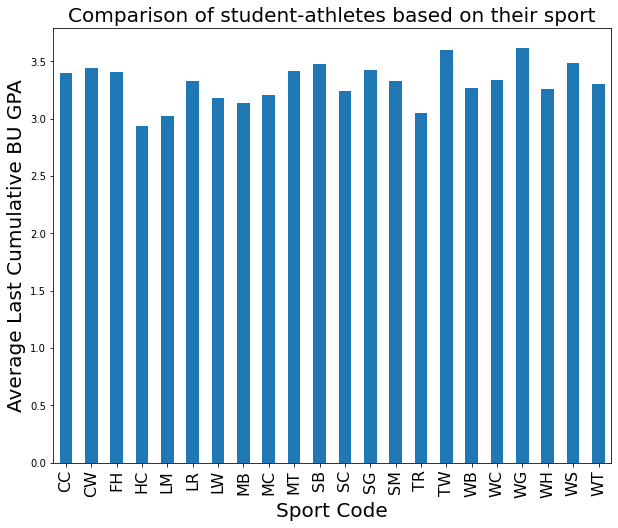

In [ ]:
# Create a bar plot with mean Last Cumulative BU GPA for each Athletic Code 1
ax = df.groupby('Athletic Code 1').mean()['Last Cumulative BU GPA'].plot(kind='bar')

# Set the X and Y labels and the title with font size
ax.set_xlabel('Sport Code', fontsize=20)
ax.set_ylabel('Average Last Cumulative BU GPA', fontsize=20)
ax.set_title('Comparison of student-athletes based on their sport', fontsize=20)

# Set the font size of the tick labels
ax.tick_params(axis='x', labelsize=16)

# Set the figure size
plt.gcf().set_size_inches(10, 8)

# Display the plot
plt.show()

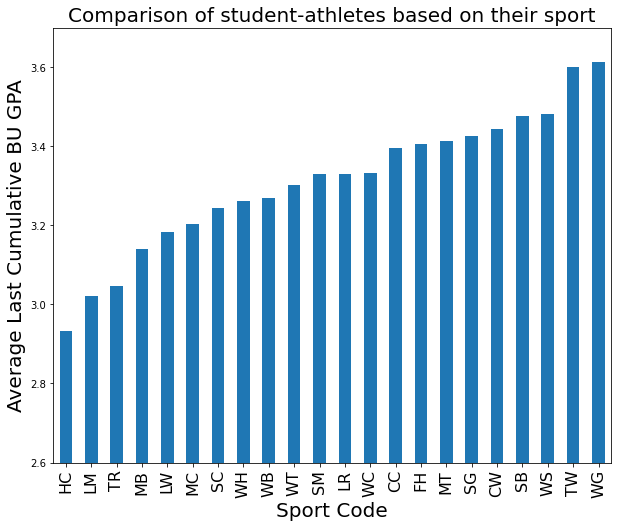

In [ ]:
a= df.groupby('Athletic Code 1').mean()['Last Cumulative BU GPA'].sort_values()

ax = a.plot(kind='bar')

# Set the X and Y labels and the title with font size
ax.set_xlabel('Sport Code', fontsize=20)
ax.set_ylabel('Average Last Cumulative BU GPA', fontsize=20)
ax.set_title('Comparison of student-athletes based on their sport', fontsize=20)
ax.set_ylim([2.6, 3.7])
# Set the font size of the tick labels
ax.tick_params(axis='x', labelsize=16)

# Set the figure size
plt.gcf().set_size_inches(10, 8)

# Display the plot
plt.show()

The student-athletes of Athletic Code 1 = ‘HC’ performed the least with average GPA = 2.93 and the student- athletes of Athletic Code 1 = ‘WG’ performed the best with average GPA = 3.61.

In [ ]:
# What are the most common majors for student athletes? Do student athletes tend to switch majors?

In [ ]:
df['FIRSTMAJOR'].nunique()

70

In [ ]:
first_major = df.groupby('FIRSTMAJOR').count()['Student']
first_major[first_major>25].sort_values()

FIRSTMAJOR
2001.0     26
905.0      28
317.0      29
614.0      29
11.0       40
401.0      47
5558.0     52
2204.0     66
506.0     167
Name: Student, dtype: int64

Each of the following ‘FIRSTMAJOR’ [2001, 905, 317, 614, 11, 401, 5558, 2204, 506] have greater than 25 students. These are the most common ‘FIRSTMAJOR’s.

In [ ]:
# What percentage of student athletes stay in the same major?

In [ ]:
df[df['FIRSTMAJOR'] == df['LASTMAJOR']]['Student'].count()

635

Out of 823 students, 635 students (77.16%) remained in the same major and the remaining 188 students (22.84%) have switched majors.

Do students from certain geographic areas (Northeast) perform better academically than another geographic area (Southwest)?

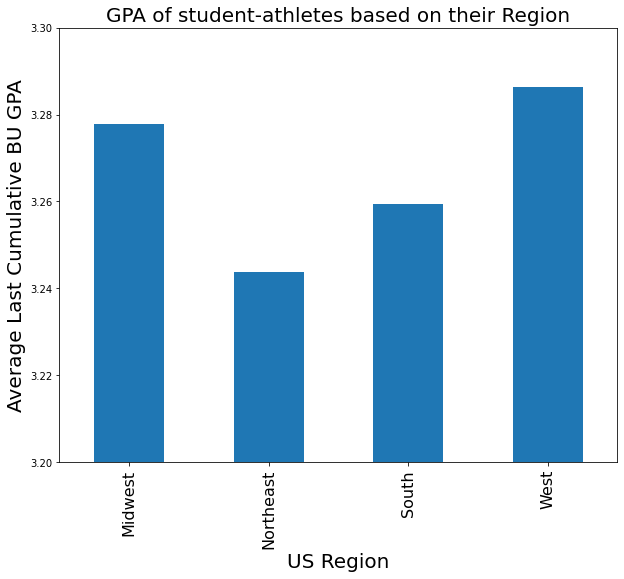

In [ ]:
# Create a bar plot with mean Last Cumulative BU GPA for each Athletic Code 1
ax = df.groupby('US Region').mean()['Last Cumulative BU GPA'].plot(kind='bar')

# Set the X and Y labels and the title with font size
ax.set_xlabel('US Region', fontsize=20)
ax.set_ylabel('Average Last Cumulative BU GPA', fontsize=20)
ax.set_title('GPA of student-athletes based on their Region', fontsize=20)
ax.set_ylim([3.2, 3.3])

# Set the font size of the tick labels
ax.tick_params(axis='x', labelsize=16)

# Set the figure size
plt.gcf().set_size_inches(10, 8)

# Display the plot
plt.show()

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

# Deliverable 2

In [ ]:
# Does English being the primary language of the country impact the students' performance?

In [ ]:
df.head()

,Data Input Yr,Student,US Region,English Language,IPEDS Race Description,Athletic Code 1,Entering Term,Yr,FCLASS,RetentionClass,...,Semester GPI-13th Sem,Semester GPI-14th Sem,Semester GPI-15th Sem,Semester GPI-16th Sem,Semester GPI-17th Sem,Semester GPI-18th Sem,Semester GPI-19th Sem,Semester GPI-20th Sem,Semester GPI-21st Sem,Semester GPI-22nd Sem
0,2022.0,1.0,NaN,English,Non-Resident Alien,HC,Fall2020,U3,FRESHMEN,Freshmen,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021.0,2.0,Northeast,NaN,African American or Black,SC,Fall2017,U4,FRESHMEN,Freshmen,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022.0,3.0,West,NaN,White,MC,Fall2020,U2,FRESHMEN,Freshmen,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022.0,4.0,West,NaN,White,WS,Fall2018,U4,FRESHMEN,Freshmen,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021.0,5.0,Northeast,NaN,White,WC,Fall2017,U4,FRESHMEN,Freshmen,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['Data Input Yr', 'Student', 'US Region', 'English Language',
       'IPEDS Race Description', 'Athletic Code 1', 'Entering Term', 'Yr',
       'FCLASS', 'RetentionClass', 'ACADINDEX', 'SATCFORAI', 'ACTUSE',
       'SATCUSE', 'SATVUSE', 'satm', 'satwr', 'HSGPA', 'FIRSTCOLLEGE',
       'FIRSTMAJOR', 'LASTCOLLEGE', 'LASTMAJOR', 'Last Cumulative BU GPA',
       'Cumulative GPA-1st Sem', 'Cumulative GPA-2nd Sem',
       'Cumulative GPA-3rd Sem', 'Cumulative GPA-4th Sem',
       'Cumulative GPA-5th Sem', 'Cumulative GPA-6th Sem',
       'Cumulative GPA-7th Sem', 'Cumulative GPA-8th Sem',
       'Cumulative GPA-9th Sem', 'Cumulative GPA-10th Sem',
       'Cumulative GPA-11th Sem', 'Cumulative GPA-12th Sem',
       'Cumulative GPA-13th Sem', 'Cumulative GPA-14th Sem',
       'Cumulative GPA-15th Sem', 'Cumulative GPA-16th Sem',
       'Cumulative GPA-17th Sem', 'Cumulative GPA-18th Sem',
       'Cumulative GPA-19th Sem', 'Cumulative GPA-20th Sem',
       'Cumulative GPA-21st Sem', 'Cumu

In [ ]:
df['English Language'].unique()

array(['English', nan, 'Non-English'], dtype=object)

Text(0.5, 1.0, 'Comparison of GPA and Language spoken')

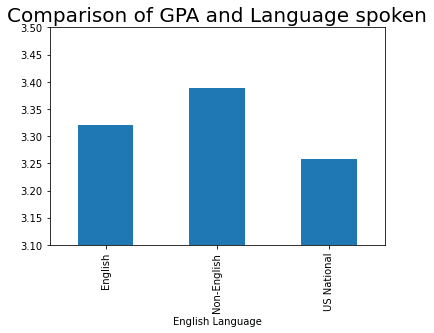

In [ ]:
ax = df.groupby('English Language', dropna = False).mean()['Last Cumulative BU GPA'].plot(kind='bar')
ax.set_ylim([3.1, 3.5])
ax.set_xticklabels(['English', 'Non-English', 'US National'])
ax.set_title('Comparison of GPA and Language spoken', fontsize=20)

TypeError: ignored

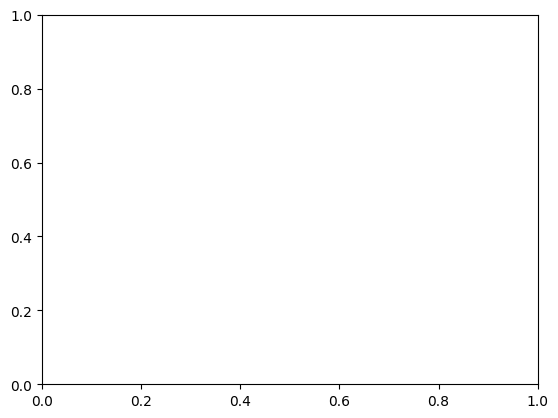

In [ ]:
# Create a list of dataframes
dfs = [y2021, y2020, y2019, y2018, y2017]

# Create a list of colors for each year
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Create a figure and axis object
fig, ax = plt.subplots()

# Iterate through each dataframe and plot on the same graph
for i, df in enumerate(dfs):
    # Group by English Language and calculate mean of Last Cumulative BU GPA
    mean_gpa = df.groupby('English Language', dropna=False)['Last Cumulative BU GPA'].mean()

    # Plot the mean GPA for each language category
    ax.bar(mean_gpa.index, mean_gpa.values, color=colors[i], alpha=0.7, label=f'Year {2017+i}')

# Set the y-axis limits and title
ax.set_ylim([3.1, 3.5])
ax.set_title('Comparison of GPA and Language Spoken', fontsize=20)

# Set the x-axis labels and legend
ax.set_xticklabels(['English', 'Non-English', 'US National'])
ax.legend()

# Show the plot
plt.show()


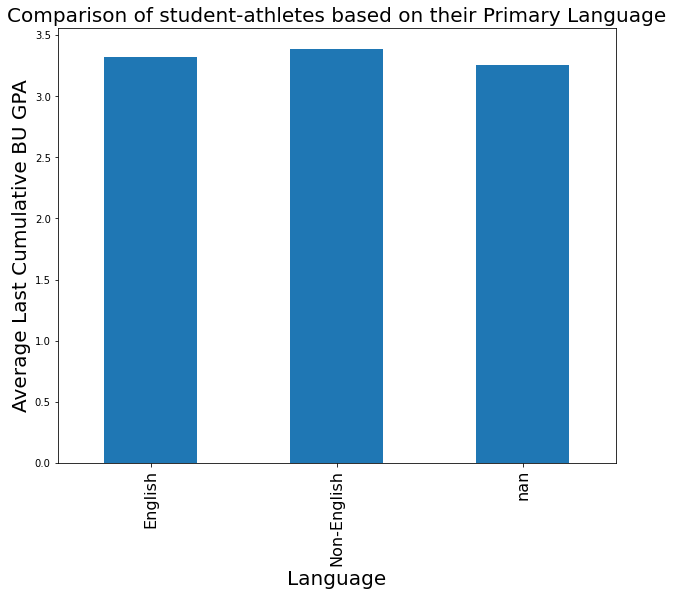

In [ ]:
# Create a bar plot with mean Last Cumulative BU GPA for each Athletic Code 1
ax = df.groupby('English Language', dropna = False).mean()['Last Cumulative BU GPA'].plot(kind='bar')

# Set the X and Y labels and the title with font size
ax.set_xlabel('Language', fontsize=20)
ax.set_ylabel('Average Last Cumulative BU GPA', fontsize=20)
ax.set_title('Comparison of student-athletes based on their Primary Language', fontsize=20)

# Set the font size of the tick labels
ax.tick_params(axis='x', labelsize=16)

# Set the figure size
plt.gcf().set_size_inches(10, 8)

# Display the plot
plt.show()

In [ ]:
# From the above plot we see that the significance of primary language on the Student's performace is very less.

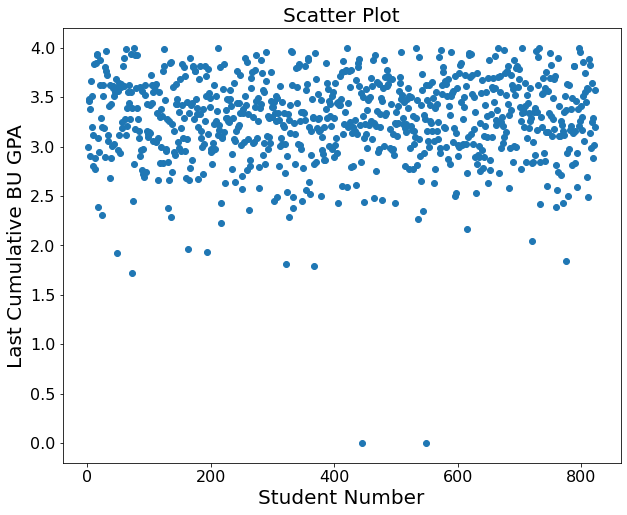

In [ ]:
# scatter plot of 'Last Cumulative BU GPA' vs 'Student'
scatter_plot = plt.scatter(df['Student'], df['Last Cumulative BU GPA'])

# set the X and Y labels and the title with font size
plt.xlabel('Student Number', fontsize=20)
plt.ylabel('Last Cumulative BU GPA', fontsize=20)
plt.title('Scatter Plot', fontsize=20)

# set the font size of the tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# set the figure size
plt.gcf().set_size_inches(10, 8)

# display the plot
plt.show()

In [ ]:
# We observe that 2 students have 0 Cumulative BU GPA.

In [ ]:
df['IPEDS Race Description'].isna().any()

False

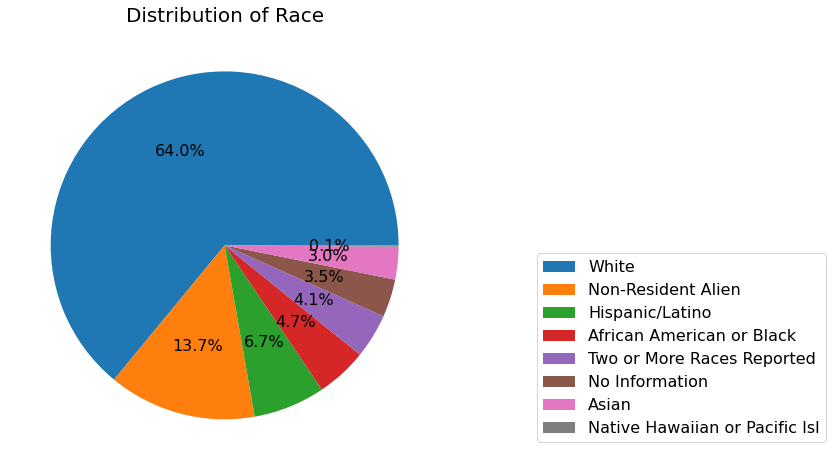

In [ ]:
# count the values in the 'IPEDS Race Description' column
race_counts = df['IPEDS Race Description'].value_counts()

# plot a pie chart of the counts
plt.pie(race_counts, autopct='%1.1f%%')

# set the title and adjust the font size
plt.title('Distribution of Race', fontsize=20)

# set the font size of the labels
plt.rcParams['font.size'] = 16

plt.legend(race_counts.index, loc='best', bbox_to_anchor=(1.2, 0.5))

# set the figure size
plt.gcf().set_size_inches(8, 8)

# display the plot
plt.show()

In [ ]:
race_counts = df['IPEDS Race Description'].value_counts()
print(race_counts)

White                             527
Non-Resident Alien                113
Hispanic/Latino                    55
African American or Black          39
Two or More Races Reported         34
No Information                     29
Asian                              25
Native Hawaiian or Pacific Isl      1
Name: IPEDS Race Description, dtype: int64


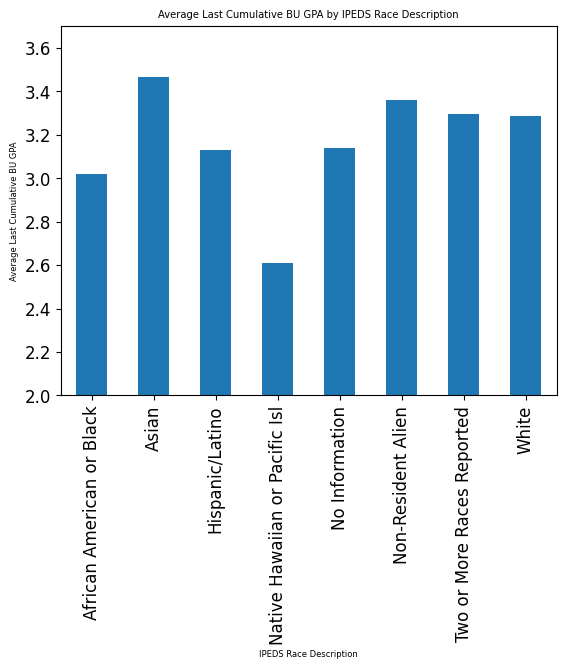

In [ ]:

# Group the DataFrame by IPEDS Race Description and calculate the mean Last Cumulative BU GPA for each group
grouped_df = df.groupby('IPEDS Race Description')['Last Cumulative BU GPA'].mean()

# Create a bar plot of the grouped data
grouped_df.plot(kind='bar')

# Add axis labels and a title
plt.xlabel('IPEDS Race Description')
plt.ylabel('Average Last Cumulative BU GPA')
plt.title('Average Last Cumulative BU GPA by IPEDS Race Description')
plt.ylim(2, 3.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

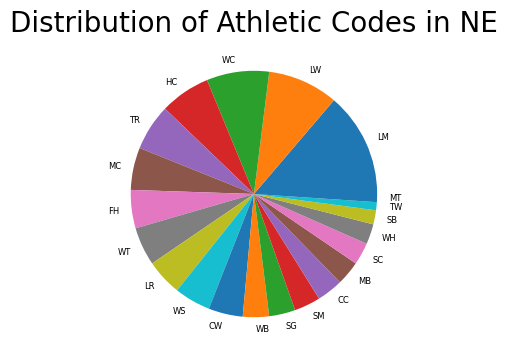

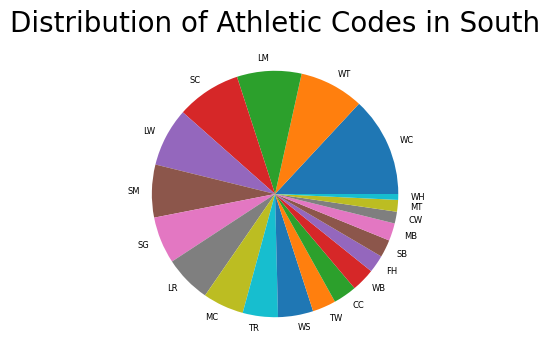

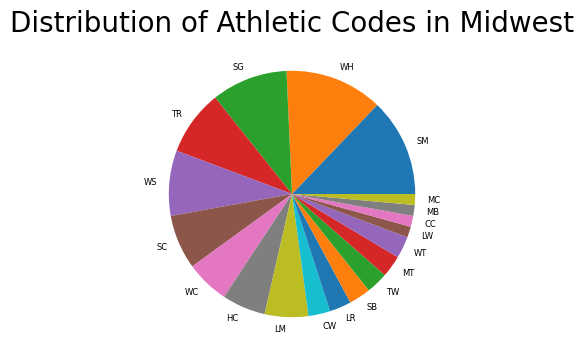

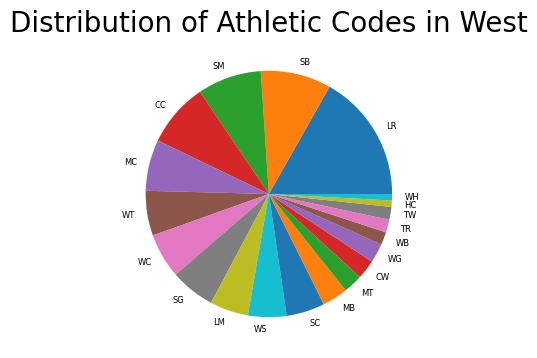

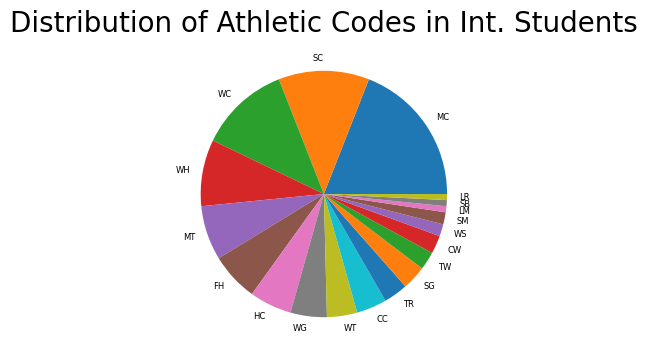

In [ ]:
#Plotting the proportion of athletes in every sport per region
import matplotlib.pyplot as plt
df['US Region'].fillna('Foreign', inplace=True)

# create separate data frames for each region
df1 = df[df['US Region'] == 'Northeast']
df2 = df[df['US Region'] == 'South']
df3 = df[df['US Region'] == 'Midwest']
df4 = df[df['US Region'] == 'West']
df5 = df[df['US Region'] == 'Foreign']

athletic_counts = df1['Athletic Code 1'].value_counts()

# plot a pie chart of the counts
plt.pie(athletic_counts, labels=athletic_counts.index)
# set the title and adjust the font size
plt.title('Distribution of Athletic Codes in NE', fontsize=20)
# set the font size of the labels
plt.rcParams['font.size'] = 6
# set the figure size
plt.gcf().set_size_inches(4, 4)
# display the plot
plt.show()



athletic_counts = df2['Athletic Code 1'].value_counts()
# plot a pie chart of the counts
plt.pie(athletic_counts, labels=athletic_counts.index)
# set the title and adjust the font size
plt.title('Distribution of Athletic Codes in South', fontsize=20)
# set the font size of the labels
plt.rcParams['font.size'] = 6
# set the figure size
plt.gcf().set_size_inches(4, 4)
# display the plot
plt.show()


athletic_counts = df3['Athletic Code 1'].value_counts()
# plot a pie chart of the counts
plt.pie(athletic_counts, labels=athletic_counts.index)
# set the title and adjust the font size
plt.title('Distribution of Athletic Codes in Midwest', fontsize=20)
# set the font size of the labels
plt.rcParams['font.size'] = 6
# set the figure size
plt.gcf().set_size_inches(4, 4)
# display the plot
plt.show()


athletic_counts = df4['Athletic Code 1'].value_counts()
# plot a pie chart of the counts
plt.pie(athletic_counts, labels=athletic_counts.index)
# set the title and adjust the font size
plt.title('Distribution of Athletic Codes in West', fontsize=20)
# set the font size of the labels
plt.rcParams['font.size'] = 6
# set the figure size
plt.gcf().set_size_inches(4, 4)
# display the plot
plt.show()


athletic_counts = df5['Athletic Code 1'].value_counts()
# plot a pie chart of the counts
plt.pie(athletic_counts, labels=athletic_counts.index)
# set the title and adjust the font size
plt.title('Distribution of Athletic Codes in Int. Students', fontsize=20)
# set the font size of the labels
plt.rcParams['font.size'] = 6
# set the figure size
plt.gcf().set_size_inches(4, 4)
# display the plot
plt.show()



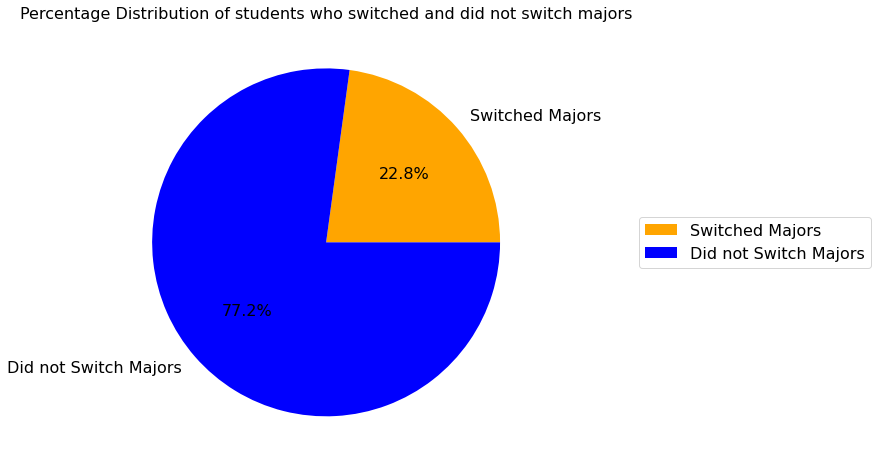

In [ ]:
switched = df[df['FIRSTMAJOR'] != df['LASTMAJOR']]['Student'].count()
did_not_switch = df[df['FIRSTMAJOR'] == df['LASTMAJOR']]['Student'].count()

# define the labels for the pie chart
labels = ['Switched Majors', 'Did not Switch Majors']

# define the colors for the pie chart wedges
colors = ['orange', 'blue']

# plot the pie chart with custom labels and colors
plt.pie([switched, did_not_switch], labels=labels, colors=colors, autopct='%1.1f%%')

# set the title and adjust the font size
plt.title('Percentage Distribution of students who switched and did not switch majors', fontsize=16)

# add a legend to the plot
plt.legend(labels, loc='center left', bbox_to_anchor=(1.2, 0.5))

# set the font size of the labels
plt.rcParams['font.size'] = 16

# set the figure size
plt.gcf().set_size_inches(8, 8)

# display the plot
plt.show()

***Deliverable 3***

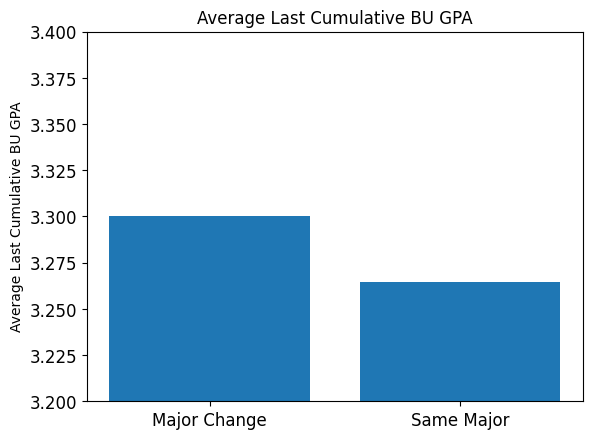

In [ ]:
a = df[df['FIRSTMAJOR'] != df['LASTMAJOR']]
b = df[df['FIRSTMAJOR'] == df['LASTMAJOR']]

# Calculate the average Last Cumulative BU GPA for DataFrames a and b
a_avg_gpa = a['Last Cumulative BU GPA'].mean()
b_avg_gpa = b['Last Cumulative BU GPA'].mean()

# Create a bar plot
plt.bar(['Major Change', 'Same Major'], [a_avg_gpa, b_avg_gpa])

# Add axis labels and a title
plt.xlabel('')
plt.ylabel('Average Last Cumulative BU GPA')
plt.title('Average Last Cumulative BU GPA')
plt.ylim(3.2, 3.4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [ ]:
df['FIRSTMAJOR'].unique()

array([2204,  602,  506,  614,  435,  401,  466, 2207,  905,  317, 5558,
         11,  518, 1509,  910, 2001,  930, 1237, 5521,  622,  601,  472,
        691,  447, 2208,  635,  208,  449,  440,  909, 1905, 5561, 1524,
       1002, 1706, 1701,   21, 1929,  441, 1742,  701, 4901, 1003,  608,
       1741, 1902,   15, 1704,  956, 1721,   14,  628,  430, 1540, 1522,
        424, 1501,  638,  313,  468, 2202,  541, 1141,  609, 1012, 1510,
       2205, 1903, 1925, 1390])

In [ ]:
# group by first major
grouped = df.groupby('FIRSTMAJOR')



# calculate percentage of same first major and last major for each group
percentage = grouped.apply(lambda x: (x['FIRSTMAJOR'] == x['LASTMAJOR']).mean() * 100)

# sort values in decreasing order
percentage = percentage.sort_values(ascending=False)


# display the result
print(percentage)



FIRSTMAJOR
11      100.0
609     100.0
701     100.0
909     100.0
14      100.0
        ...  
622       0.0
430       0.0
1925      0.0
1905      0.0
472       0.0
Length: 70, dtype: float64


NameError: ignored

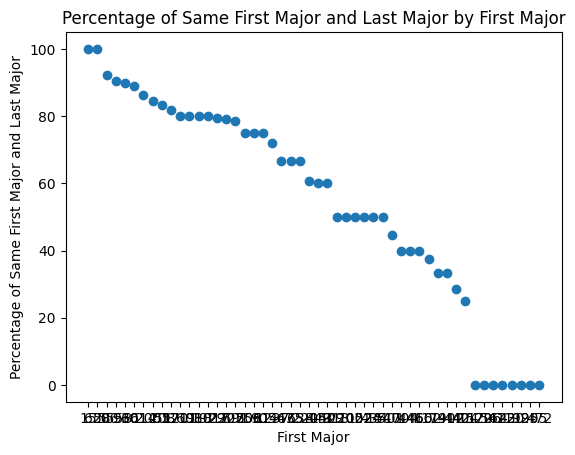

In [ ]:
import matplotlib.pyplot as plt

# Get the last 10 rows of the percentage DataFrame
last_10 = percentage.tail(50)

# Plot a scatterplot with x=first major and y=percentage
plt.scatter(last_10.index.astype(str), last_10.values)

# Set the axis labels and title
plt.xlabel('First Major')
plt.ylabel('Percentage of Same First Major and Last Major')
plt.title('Percentage of Same First Major and Last Major by First Major')

# Rotate the x-axis labels to avoid overlap
ax.set_xticklabels(codes, fontsize=15, rotation=90)

# Show the plot
plt.show()


ValueError: ignored

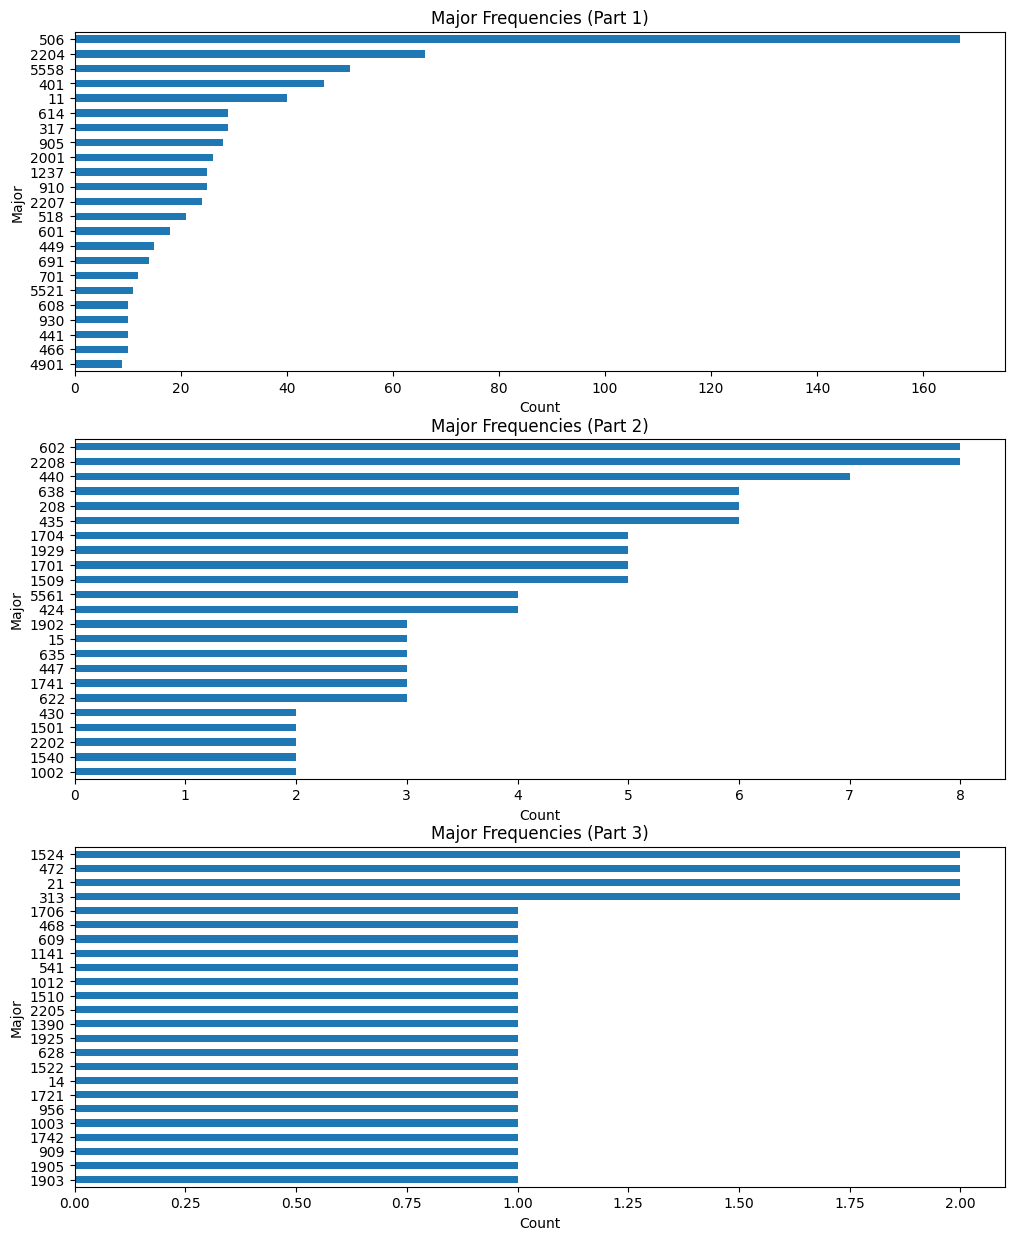

In [ ]:
# Count the frequency of each major
major_count = df['FIRSTMAJOR'].value_counts()

# Split the major count into three bar plots, sorted in ascending order of frequency
fig, axs = plt.subplots(nrows=3, figsize=(12,15))
major_count.iloc[:len(major_count)//3].sort_values().plot(kind='barh', ax=axs[0])
major_count.iloc[len(major_count)//3:2*len(major_count)//3].sort_values().plot(kind='barh', ax=axs[1])
major_count.iloc[2*len(major_count)//3:].sort_values().plot(kind='barh', ax=axs[2])

# Set the axis labels and title
axs[0].set_xlabel('Count')
axs[1].set_xlabel('Count')
axs[2].set_xlabel('Count')
axs[0].set_ylabel('Major')
axs[1].set_ylabel('Major')
axs[2].set_ylabel('Major')
axs[0].set_title('Major Frequencies (Part 1)')
axs[1].set_title('Major Frequencies (Part 2)')
axs[2].set_title('Major Frequencies (Part 3)')

# Show only labels that are in the dataset
majors = df['FIRSTMAJOR'].unique()
axs[0].set_yticklabels([maj for maj in majors if maj in major_count.index])
axs[1].set_yticklabels([maj for maj in majors if maj in major_count.index])
axs[2].set_yticklabels([maj for maj in majors if maj in major_count.index])

# Adjust the layout to prevent overlap
plt.tight_layout()

# Set the x-axis tick label size and rotation
for ax in axs:
    ax.tick_params(axis='x', labelsize=12, rotation=45)

# Show the plot
plt.show()



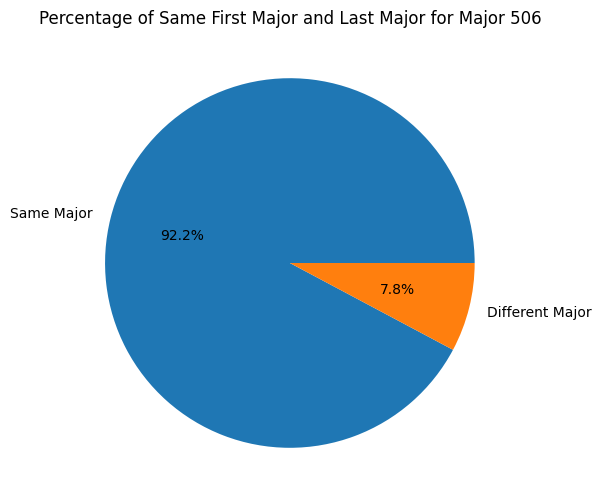

In [ ]:
# Select rows with FIRSTMAJOR equal to 506
major506 = df[df['FIRSTMAJOR'] == 506]

# Calculate percentage of same first major and last major
same_major_percentage = (major506['FIRSTMAJOR'] == major506['LASTMAJOR']).mean() * 100

# Create pie chart
fig, ax = plt.subplots(figsize=(6,6))
ax.pie([same_major_percentage, 100 - same_major_percentage], labels=['Same Major', 'Different Major'], autopct='%1.1f%%')

# Add title
ax.set_title('Percentage of Same First Major and Last Major for Major 506')

# Show the plot
plt.show()


2.92% of students with different first and last majors have last major as 506


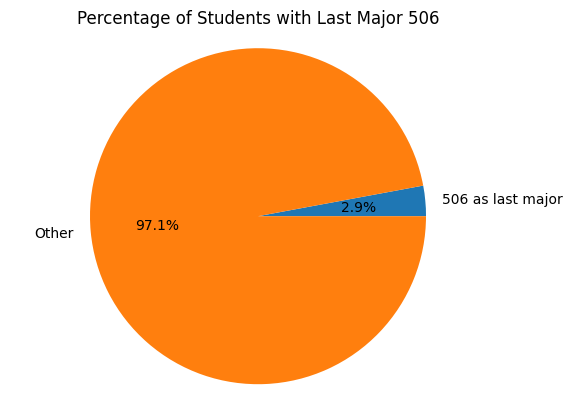

In [ ]:
# Filter the DataFrame
filtered = df[(df['FIRSTMAJOR'] != df['LASTMAJOR']) & (df['LASTMAJOR'] == 506)]

# Calculate the percentage
percent = (len(filtered) / len(df)) * 100

# Print the percentage
print(f"{percent:.2f}% of students with different first and last majors have last major as 506")

# Plot a pie chart
labels = ['506 as last major', 'Other']
sizes = [len(filtered), len(df) - len(filtered)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Students with Last Major 506')
plt.axis('equal')
plt.show()


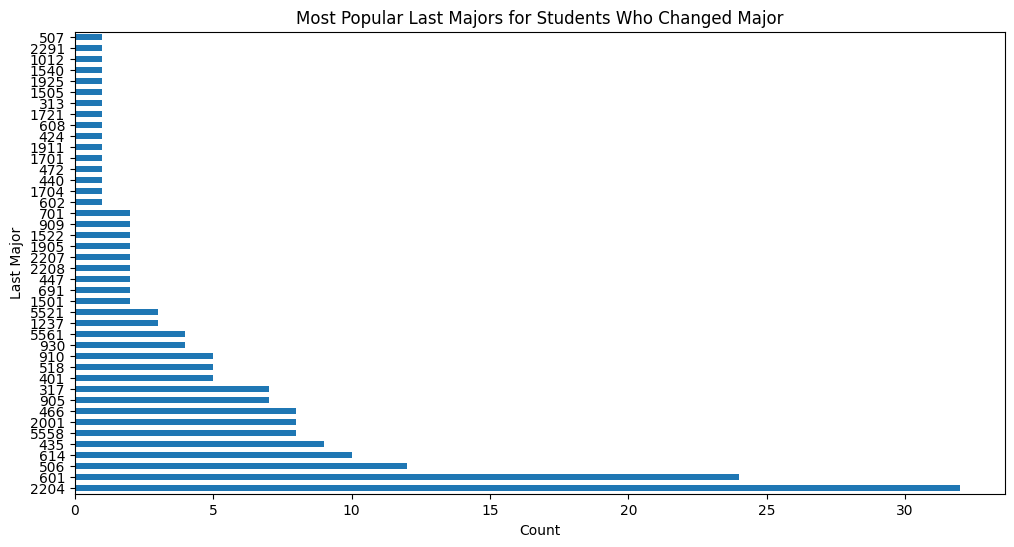

In [ ]:
# Count the number of students who changed their major
major_change_count = (df['FIRSTMAJOR'] != df['LASTMAJOR']).sum()

# Count the frequency of each last major among students who changed their major
last_major_counts = df[df['FIRSTMAJOR'] != df['LASTMAJOR']]['LASTMAJOR'].value_counts()

# Sort the last major counts in descending order
last_major_counts = last_major_counts.sort_values(ascending=False)

# Plot the last major counts using a horizontal bar plot
fig, ax = plt.subplots(figsize=(12,6))
last_major_counts.plot(kind='barh', ax=ax)

# Set the axis labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Last Major')
ax.set_title('Most Popular Last Majors for Students Who Changed Major')

# Show only labels that are in the dataset
majors = df['LASTMAJOR'].unique()
ax.set_yticklabels([maj for maj in majors if maj in last_major_counts.index])

# Show the plot
plt.show()


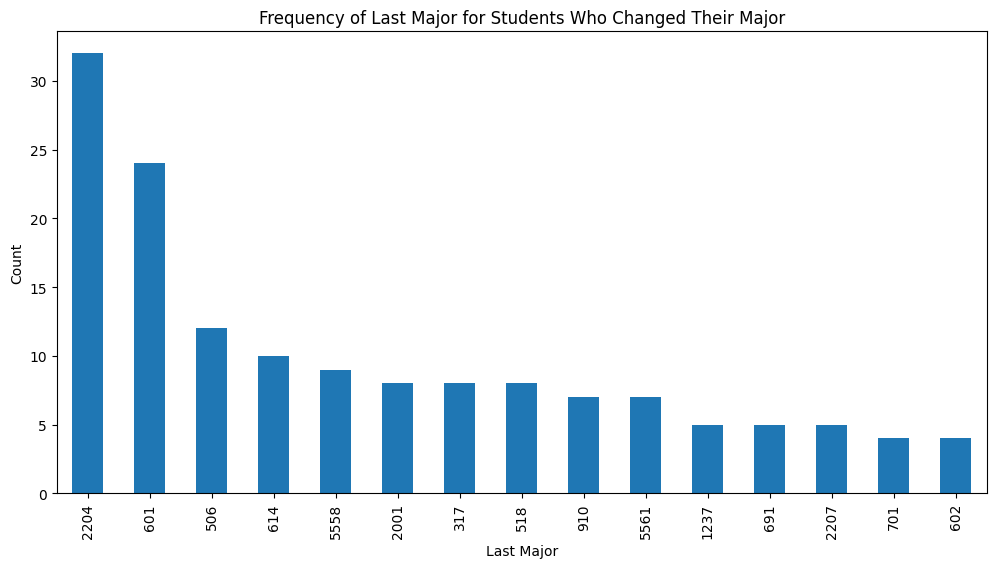

In [ ]:
# Create a new dataframe with only students who changed their major
changed_major_df = df[df['FIRSTMAJOR'] != df['LASTMAJOR']]

# Count the frequency of each last major for students who changed their major
last_major_count = changed_major_df['LASTMAJOR'].value_counts().sort_values(ascending=False)

# Get the 15 majors with the highest count
top_last_majors = last_major_count.iloc[:15]

# Create a bar plot of the top 15 last majors
fig, ax = plt.subplots(figsize=(12,6))
top_last_majors.plot(kind='bar', ax=ax)

# Set the axis labels and title
ax.set_xlabel('Last Major')
ax.set_ylabel('Count')
ax.set_title('Frequency of Last Major for Students Who Changed Their Major')

# Show only labels that are in the dataset
majors = df['LASTMAJOR'].unique()
ax.set_xticklabels([maj for maj in majors if maj in top_last_majors.index])

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=90)

# Show the plot
plt.show()


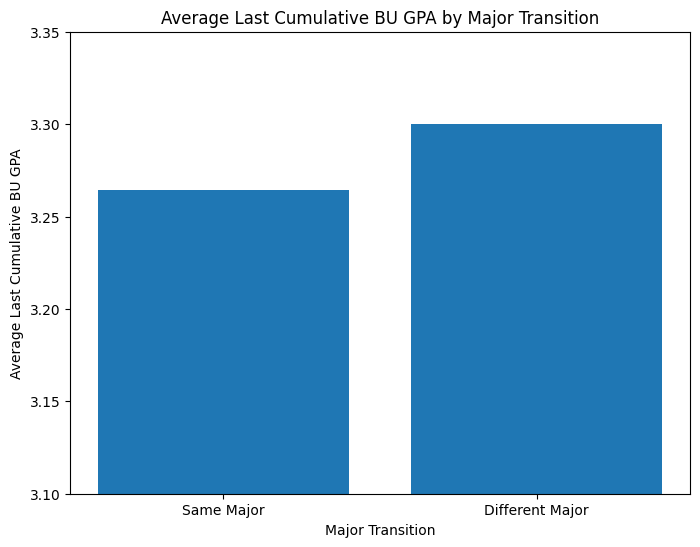

In [ ]:
# Group the dataset into two groups based on whether the students have the same or different first major and last major
same_major = df[df['FIRSTMAJOR'] == df['LASTMAJOR']]
diff_major = df[df['FIRSTMAJOR'] != df['LASTMAJOR']]

# Calculate the average last cumulative BU GPA for both groups
same_major_gpa = same_major['Last Cumulative BU GPA'].mean()
diff_major_gpa = diff_major['Last Cumulative BU GPA'].mean()

# Plot the results
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Same Major', 'Different Major'], [same_major_gpa, diff_major_gpa])

# Set the axis labels and title
ax.set_xlabel('Major Transition')
ax.set_ylabel('Average Last Cumulative BU GPA')
ax.set_title('Average Last Cumulative BU GPA by Major Transition')
plt.ylim(3.1, 3.35)
# Show the plot
plt.show()


In [ ]:
count = df['FIRSTMAJOR'].value_counts()
print(count[30:])


1929    5
1701    5
1509    5
5561    4
424     4
1902    3
15      3
635     3
447     3
1741    3
622     3
1501    2
2202    2
1540    2
430     2
1002    2
1524    2
472     2
21      2
313     2
468     1
609     1
1141    1
541     1
1012    1
1510    1
2205    1
1903    1
1925    1
628     1
1522    1
14      1
1721    1
956     1
1003    1
1742    1
909     1
1905    1
1706    1
1390    1
Name: FIRSTMAJOR, dtype: int64


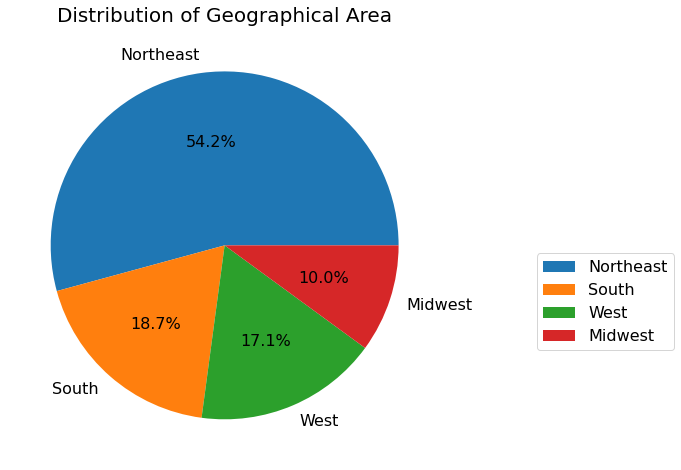

In [ ]:
geo_counts = df['US Region'].value_counts()

# plot a pie chart of the counts
plt.pie(geo_counts, labels = geo_counts.index, autopct='%1.1f%%')

# set the title and adjust the font size
plt.title('Distribution of Geographical Area', fontsize=20)

# set the font size of the labels
plt.rcParams['font.size'] = 16

plt.legend(geo_counts.index, loc='best', bbox_to_anchor=(1.2, 0.5))

# set the figure size
plt.gcf().set_size_inches(8, 8)

# display the plot
plt.show()

In [ ]:
d1=df
d1["Entering Term"].unique()

array(['Fall2020', 'Fall2017', 'Fall2018', 'Fall2019', 'Fall2021',
       'Fall2016', 'Sprg2022', 'Fall 2020', 'Sprg2021', 'Fall 2021'],
      dtype=object)

In [ ]:
d1.groupby("Entering Term").count()

,Data Input Yr,Student,US Region,English Language,IPEDS Race Description,Athletic Code 1,Yr,FCLASS,RetentionClass,ACADINDEX,...,Semester GPI-13th Sem,Semester GPI-14th Sem,Semester GPI-15th Sem,Semester GPI-16th Sem,Semester GPI-17th Sem,Semester GPI-18th Sem,Semester GPI-19th Sem,Semester GPI-20th Sem,Semester GPI-21st Sem,Semester GPI-22nd Sem
Entering Term,,,,,,,,,,,,,,,,,,,,,
Fall 2020,2,2,2,0,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Fall 2021,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Fall2016,9,9,6,3,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
Fall2017,117,117,100,17,117,117,117,117,117,116,...,117,117,117,117,117,117,117,117,117,117
Fall2018,147,147,124,23,147,147,147,147,147,146,...,147,147,147,147,147,147,147,147,147,147
Fall2019,167,167,140,27,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,167
Fall2020,194,194,167,27,194,194,194,194,194,193,...,194,194,194,194,194,194,194,194,194,194
Fall2021,177,177,150,27,177,177,177,177,174,116,...,177,177,177,177,177,177,177,177,177,177
Sprg2021,2,2,1,1,2,2,2,2,2,1,...,2,2,2,2,2,2,2,2,2,2


In [ ]:
d1=df

y2021 = d1.loc[d1["Entering Term"].isin(["Fall 2021", "Fall2021","Sprg2021"])]
y2022 = d1.loc[d1["Entering Term"] == "Fall2022"]
y2020 = d1.loc[d1["Entering Term"].isin(["Fall 2020", "Fall2020","Sprg2020"])]
y2019 = d1.loc[d1["Entering Term"] == "Fall2019"]
y2018 = d1.loc[d1["Entering Term"] == "Fall2018"]
y2017 = d1.loc[d1["Entering Term"] == "Fall2017"]
y2016 = d1.loc[d1["Entering Term"] == "Fall2016"]

y2022.name = "2022"
y2021.name = "2021"
y2020.name = "2020"
y2019.name = "2019"
y2018.name = "2018"
y2017.name = "2017"
y2016.name = "2016"





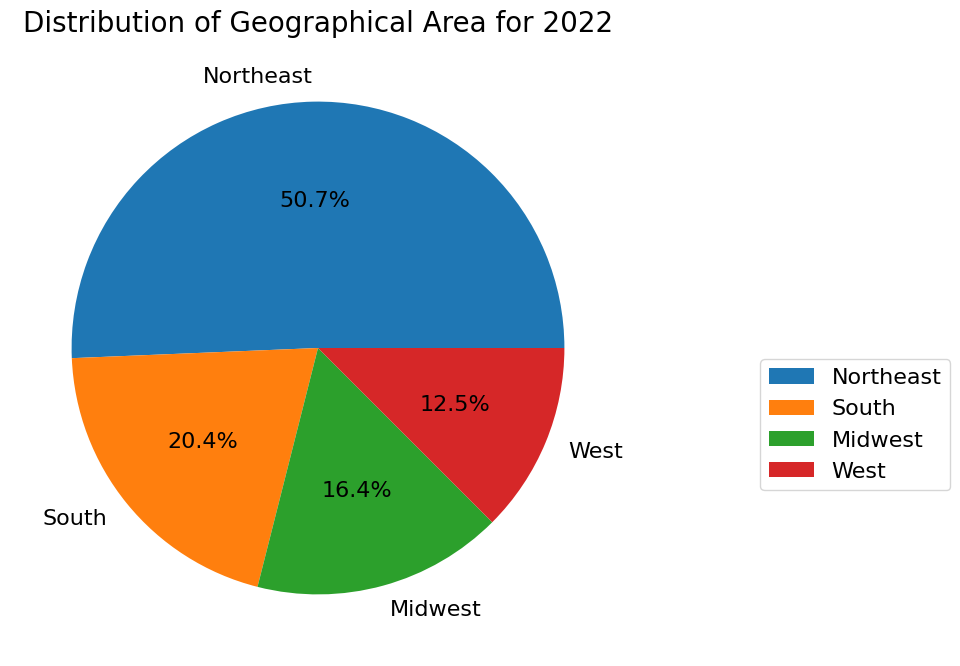

In [ ]:
geo_counts2 = y21['US Region'].value_counts()
# plot a pie chart of the counts
plt.pie(geo_counts2, labels = geo_counts2.index, autopct='%1.1f%%')


# set the title and adjust the font size
plt.title('Distribution of Geographical Area for 2021', fontsize=20)

# set the font size of the labels
plt.rcParams['font.size'] = 16

plt.legend(geo_counts2.index, loc='best', bbox_to_anchor=(1.2, 0.5))

# set the figure size
plt.gcf().set_size_inches(8, 8)

# display the plot
plt.show()

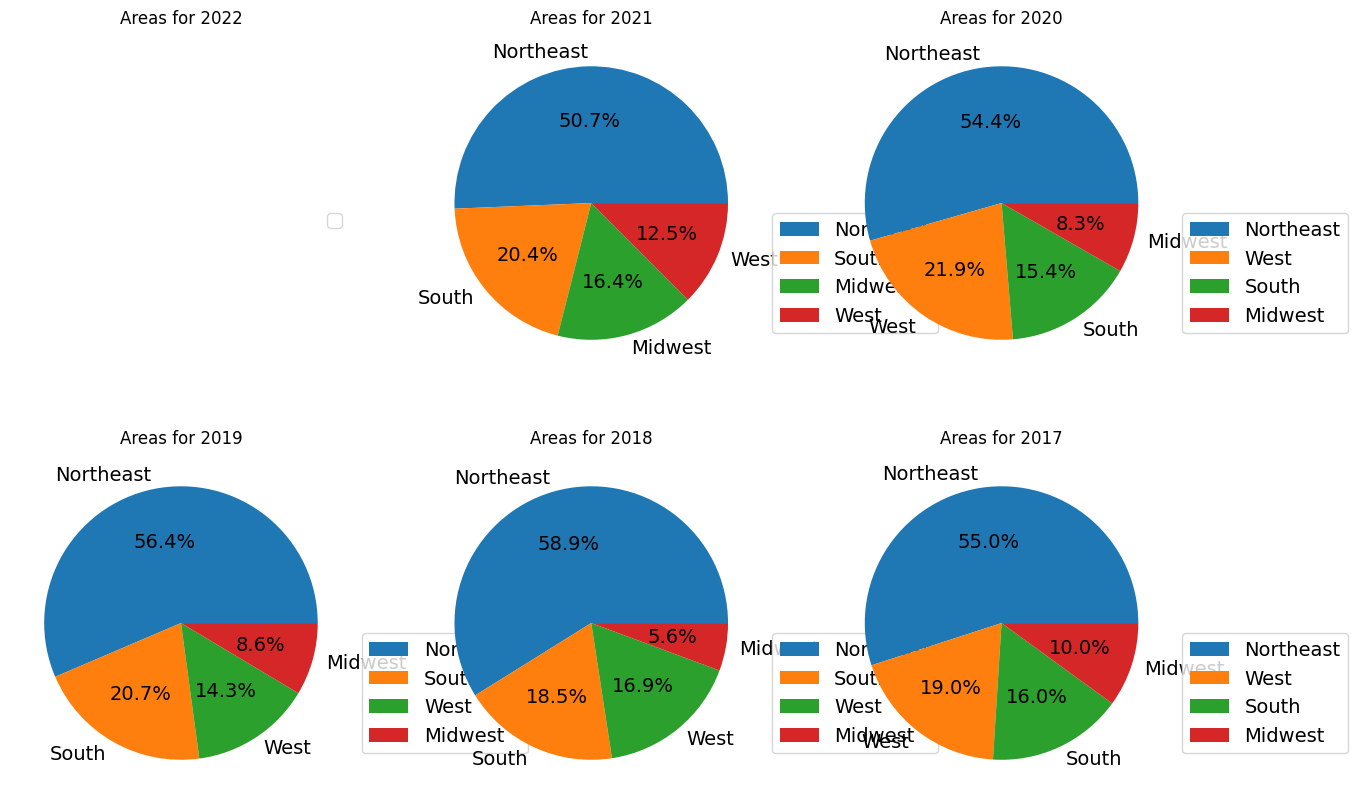

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a list of data frames for all years
dfs = [y2022, y2021, y2020, y2019, y2018, y2017]


# Create a figure with subplots for each year
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

# Loop through each year and plot the pie chart
for i, year in enumerate(dfs):
    # Get the counts for the US Region column
    geo_counts = year['US Region'].value_counts()

    # Plot a pie chart of the counts
    axs[i//3, i%3].pie(geo_counts, labels=geo_counts.index, autopct='%1.1f%%')
    axs[i//3, i%3].set_title(f'Areas for {2022-i}', fontsize=12)


    # Set the font size of the labels
    plt.rcParams['font.size'] = 14

    # Add a legend to the plot
    axs[i//3, i%3].legend(geo_counts.index, loc='best', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()



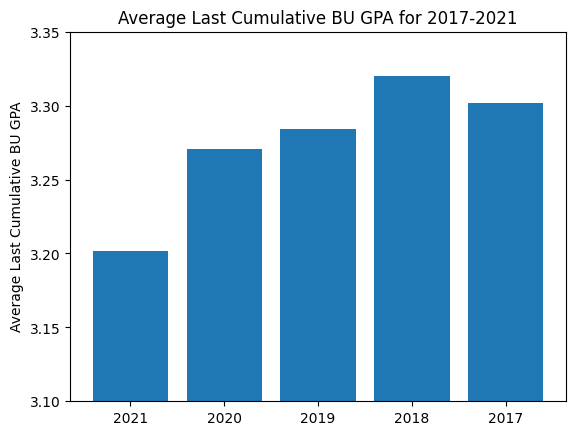

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of data frames
dfs = [y2021, y2020, y2019, y2018, y2017]

# Calculate the average Last Cumulative BU GPA for each data frame
avg_gpas = []
for df in dfs:
    avg_gpa = df['Last Cumulative BU GPA'].mean()
    avg_gpas.append(avg_gpa)

# Create a bar plot
plt.bar([ '2021', '2020', '2019', '2018', '2017'], avg_gpas)

# Add axis labels and a title
plt.xlabel('')
plt.ylabel('Average Last Cumulative BU GPA')
plt.title('Average Last Cumulative BU GPA for 2017-2021')
plt.ylim(3.1, 3.35)
# Show the plot
plt.show()




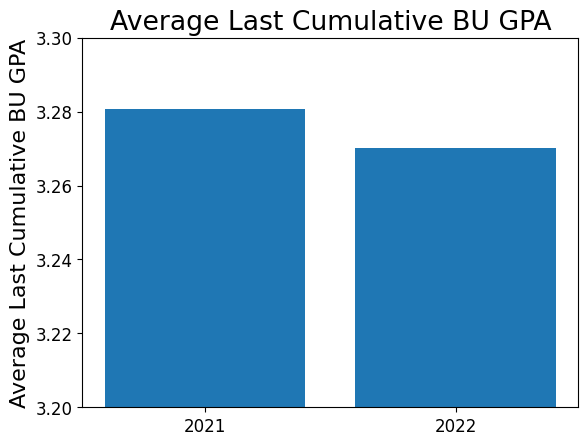

In [ ]:
# Calculate the average Last Cumulative BU GPA for DataFrames a and b
a_avg_gpa = y1['Last Cumulative BU GPA'].mean()
b_avg_gpa = y2['Last Cumulative BU GPA'].mean()

# Create a bar plot
plt.bar(['2021', '2022'], [a_avg_gpa, b_avg_gpa])

# Add axis labels and a title
plt.xlabel('')
plt.ylabel('Average Last Cumulative BU GPA')
plt.title('Average Last Cumulative BU GPA')
plt.ylim(3.2, 3.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

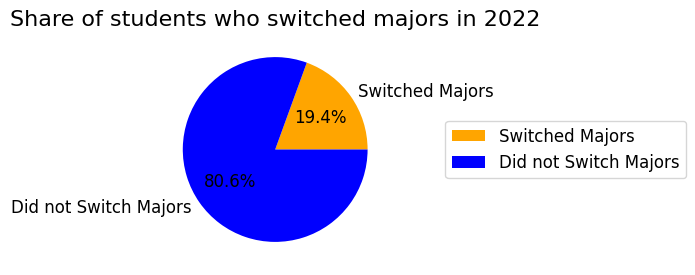

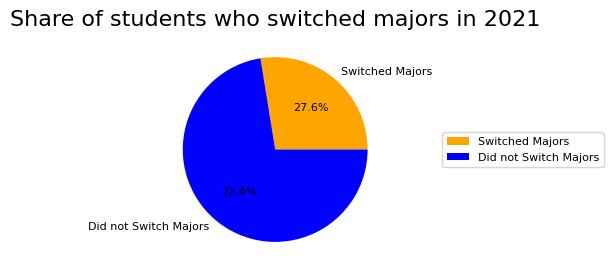

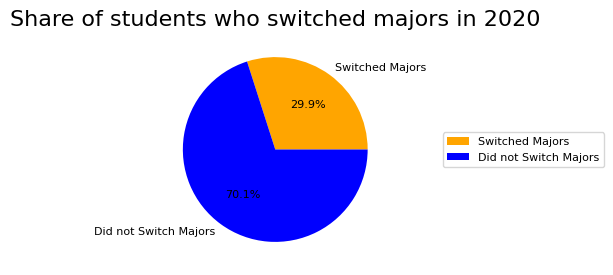

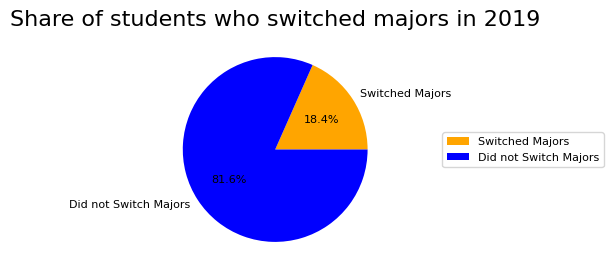

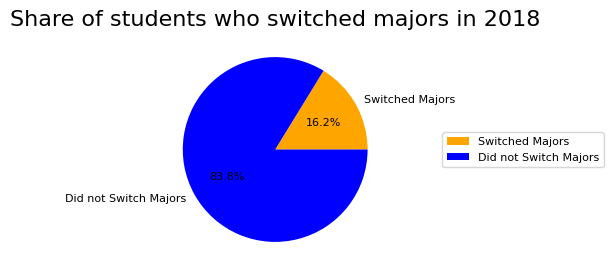

In [ ]:
# define the labels for the pie chart
labels = ['Switched Majors', 'Did not Switch Majors']

# define the colors for the pie chart wedges
colors = ['orange', 'blue']

for i, df in enumerate(dfs):
    switched = df[df['FIRSTMAJOR'] != df['LASTMAJOR']]['Student'].count()
    did_not_switch = df[df['FIRSTMAJOR'] == df['LASTMAJOR']]['Student'].count()

    # plot the pie chart with custom labels and colors
    plt.pie([switched, did_not_switch], labels=labels, colors=colors, autopct='%1.1f%%')

    # set the title and adjust the font size
    plt.title(f'Share of students who switched majors in {2022-i}', fontsize=16)

    # add a legend to the plot
    plt.legend(labels, loc='center left', bbox_to_anchor=(1.2, 0.5))

    # set the font size of the labels
    plt.rcParams['font.size'] = 8

    # set the figure size
    plt.gcf().set_size_inches(3, 3)

    # display the plot
    plt.show()


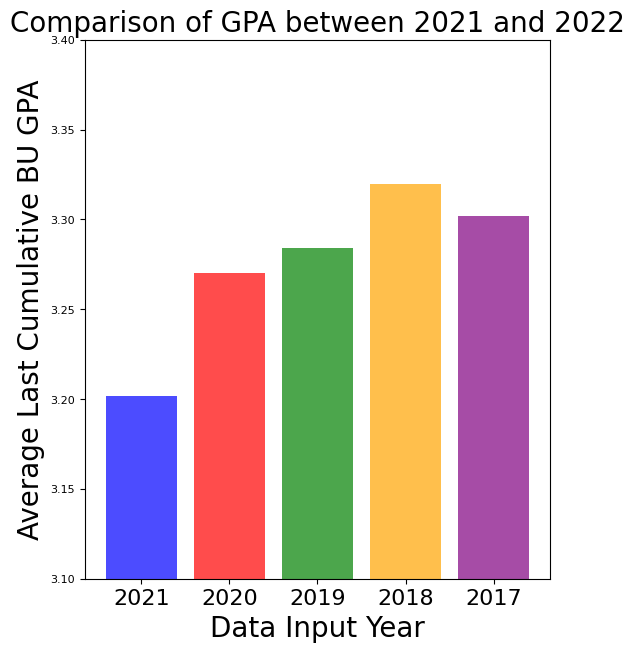

In [ ]:
import matplotlib.pyplot as plt

# Calculate the mean GPA for each year in the dfs list
gpa_means = [df['Last Cumulative BU GPA'].mean() for df in dfs]

# Create a list of strings with the year values for each dataframe
years = [ '2021', '2020', '2019', '2018', '2017']

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a bar plot with the GPA means for each year in the dfs list
ax.bar(years, gpa_means, color=['blue', 'red', 'green', 'orange', 'purple'], alpha=0.7)

# Set the X and Y labels and the title with font size
ax.set_xlabel(' Year', fontsize=20)
ax.set_ylabel('Average Last Cumulative BU GPA', fontsize=20)
ax.set_title('Comparison of GPA between 2021 and 2022', fontsize=20)
ax.set_ylim([3.1, 3.4])

# Set the font size of the tick labels
ax.tick_params(axis='x', labelsize=16)

# Set the figure size
fig.set_size_inches(6, 7)

# Display the plot
plt.show()




<ipython-input-10-4b6379d8baaf>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gpa_means.append(df.groupby('Athletic Code 1').mean()['Last Cumulative BU GPA'])
<ipython-input-10-4b6379d8baaf>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gpa_means.append(df.groupby('Athletic Code 1').mean()['Last Cumulative BU GPA'])
<ipython-input-10-4b6379d8baaf>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gpa_means.app

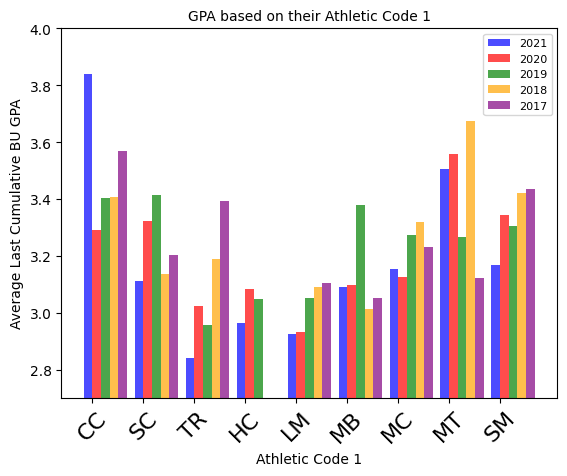

In [ ]:
import matplotlib.pyplot as plt


# Create a figure and axis object
fig, ax = plt.subplots()

# Get the unique values of Athletic Code 1
codes = ['CC', 'SC', 'TR', 'HC', 'LM', 'MB', 'MC', 'MT', 'SM']

# Set the bar width and position offset
width = 0.17
offset = width/2

# Plot the data for each year in dfs side by side with different colors
gpa_means = []
years = [ '2021', '2020', '2019', '2018', '2017']
for df in dfs:
    gpa_means.append(df.groupby('Athletic Code 1').mean()['Last Cumulative BU GPA'])
for i, year_gpa in enumerate(gpa_means):
    ax.bar([j+width*i-offset for j in range(len(codes))], year_gpa[codes], width, alpha=0.7, label=str(years[i]), color=['blue', 'red', 'green', 'orange', 'purple'][i])

# Set the X and Y labels and the title with font size
ax.set_xlabel('Athletic Code 1', fontsize=10)
ax.set_ylabel('Average Last Cumulative BU GPA', fontsize=10)
ax.set_title('GPA based on their Athletic Code 1', fontsize=10)
ax.set_ylim([2.7, 4])

# Set the x ticks and tick labels
ax.set_xticks(range(len(codes)))
ax.set_xticklabels(codes, fontsize=16, rotation=45)

# Set the legend
# Set the legend
ax.legend(fontsize=8)





<ipython-input-11-7f2640f48b89>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gpa_means.append(df.groupby('Athletic Code 1').mean()['Last Cumulative BU GPA'])
<ipython-input-11-7f2640f48b89>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gpa_means.append(df.groupby('Athletic Code 1').mean()['Last Cumulative BU GPA'])
<ipython-input-11-7f2640f48b89>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gpa_means.app

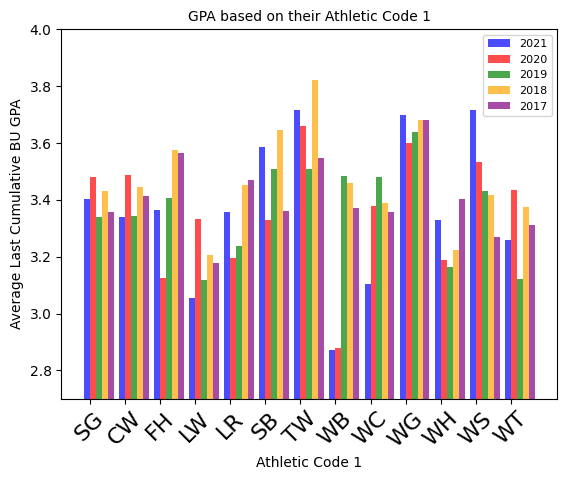

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

# Get the unique values of Athletic Code 1
codes = ['SG', 'CW', 'FH', 'LW', 'LR', 'SB', 'TW', 'WB', 'WC', 'WG', 'WH', 'WS', 'WT']
# Set the bar width and position offset
width = 0.17
offset = width/2

# Plot the data for each year in dfs side by side with different colors
gpa_means = []
years = [ '2021', '2020', '2019', '2018', '2017']
for df in dfs:
    gpa_means.append(df.groupby('Athletic Code 1').mean()['Last Cumulative BU GPA'])
for i, year_gpa in enumerate(gpa_means):
    ax.bar([j+width*i-offset for j in range(len(codes))], year_gpa[codes], width, alpha=0.7, label=str(years[i]), color=['blue', 'red', 'green', 'orange', 'purple'][i])

# Set the X and Y labels and the title with font size
ax.set_xlabel('Athletic Code 1', fontsize=10)
ax.set_ylabel('Average Last Cumulative BU GPA', fontsize=10)
ax.set_title('GPA based on their Athletic Code 1', fontsize=10)
ax.set_ylim([2.7, 4])

# Set the x ticks and tick labels
ax.set_xticks(range(len(codes)))
ax.set_xticklabels(codes, fontsize=16, rotation=45)

# Set the legend
ax.legend(fontsize=8)

# Show the plot
plt.show()

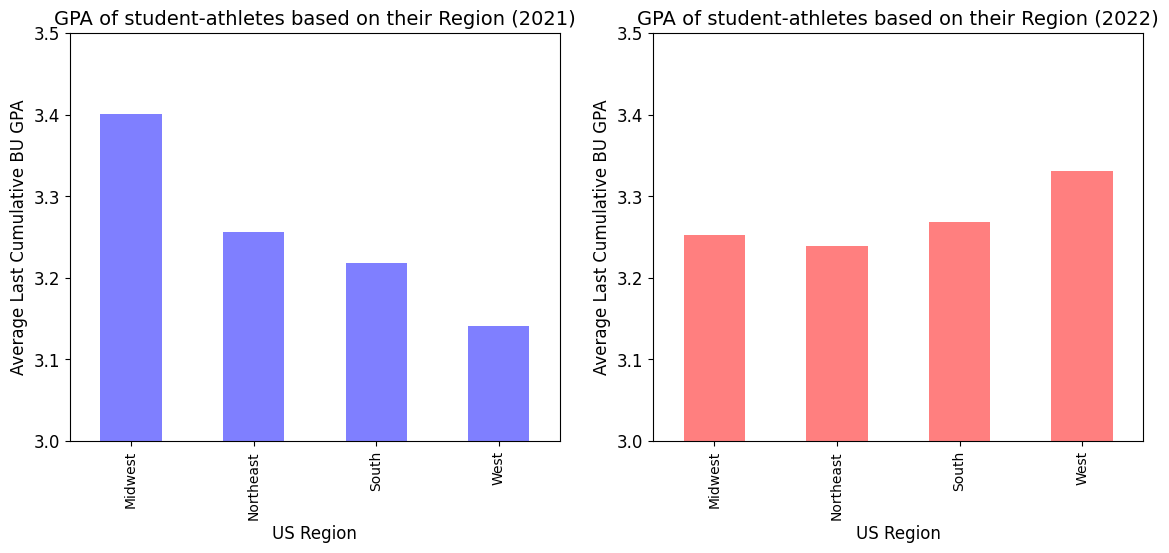

In [ ]:
import matplotlib.pyplot as plt

# Group the data by US Region and Data Input Year and calculate the mean Last Cumulative BU GPA for each group
y1_grouped_df = y1.groupby('US Region')['Last Cumulative BU GPA'].mean()
y2_grouped_df = y2.groupby('US Region')['Last Cumulative BU GPA'].mean()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Create the bar plots for each year and set their colors
y1_grouped_df.plot(kind='bar', ax=ax1, color='blue', alpha=0.5)
y2_grouped_df.plot(kind='bar', ax=ax2, color='red', alpha=0.5)

# Set the X and Y labels and the title for each subplot
ax1.set_xlabel('US Region', fontsize=12)
ax1.set_ylabel('Average Last Cumulative BU GPA', fontsize=12)
ax1.set_title('GPA of student-athletes based on their Region (2021)', fontsize=14)
ax1.set_ylim([3, 3.5])
ax1.tick_params(axis='x', labelsize=10)

ax2.set_xlabel('US Region', fontsize=12)
ax2.set_ylabel('Average Last Cumulative BU GPA', fontsize=12)
ax2.set_title('GPA of student-athletes based on their Region (2022)', fontsize=14)
ax2.set_ylim([3, 3.5])
ax2.tick_params(axis='x', labelsize=10)

# Adjust the layout and spacing of the subplots
plt.tight_layout(pad=2)

# Display the plot
plt.show()



<ipython-input-88-18b16edae947>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]['US Region'] = dfs[i]['US Region'].astype(str)
<ipython-input-88-18b16edae947>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gpa_means.append(df.groupby('US Region').mean()['Last Cumulative BU GPA'])
<ipython-input-88-18b16edae947>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function

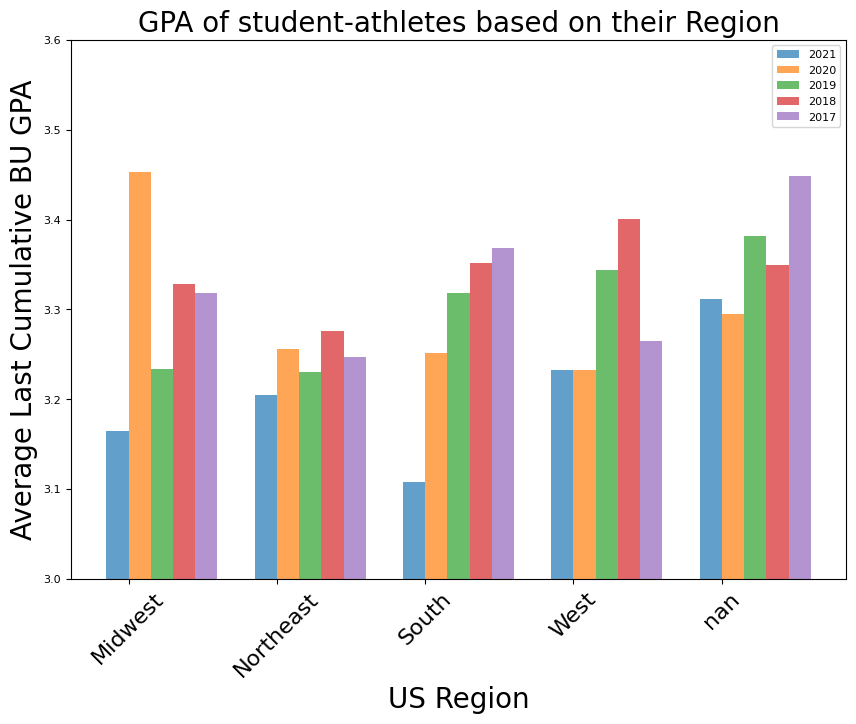

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

# Convert the US Region column to string data type in all data frames
for i in range(len(dfs)):
    dfs[i]['US Region'] = dfs[i]['US Region'].astype(str)

# Get the unique values of US Region
regions = sorted(set(dfs[0]['US Region']) | set(dfs[1]['US Region']) | set(dfs[2]['US Region']) | set(dfs[3]['US Region']) | set(dfs[4]['US Region']))

# Set the bar width and position offset
width = 0.15
offset = width/2

# Plot the data for each year in dfs side by side with different colors
gpa_means = []
years = [ '2021', '2020', '2019', '2018', '2017']
for df in dfs:
    gpa_means.append(df.groupby('US Region').mean()['Last Cumulative BU GPA'])
for i, year_gpa in enumerate(gpa_means):
    ax.bar([j+width*i-offset for j in range(len(regions))], year_gpa[regions], width, alpha=0.7, label=str(years[i]))

# Set the X and Y labels and the title with font size
ax.set_xlabel('US Region', fontsize=20)
ax.set_ylabel('Average Last Cumulative BU GPA', fontsize=20)
ax.set_title('GPA of student-athletes based on their Region', fontsize=20)
ax.set_ylim([3, 3.6])

# Set the x ticks and tick labels
ax.set_xticks(range(len(regions)))
ax.set_xticklabels(regions, fontsize=16, rotation=45)

# Set the legend
ax.legend(fontsize=8)

# Set the figure size
fig.set_size_inches(10, 7)

# Display the plot
plt.show()



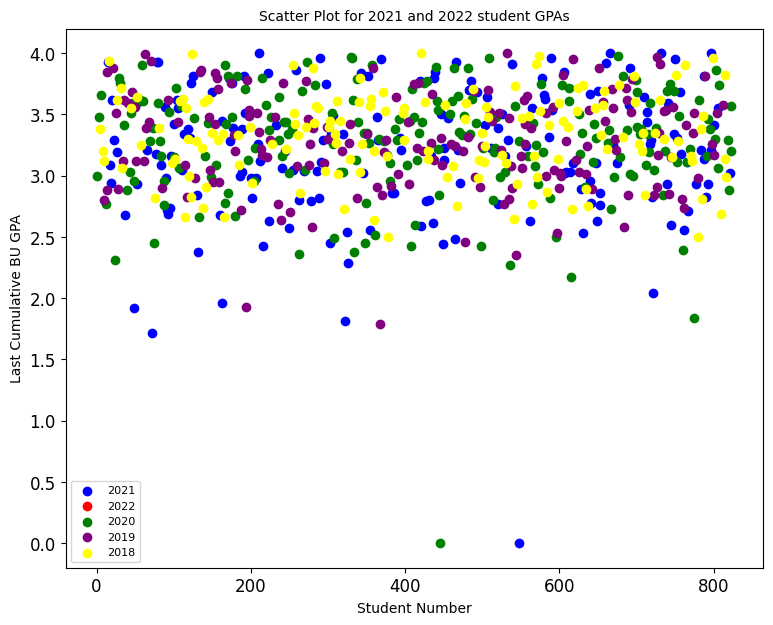

In [ ]:
# Create a scatter plot of 'Last Cumulative BU GPA' vs 'Student' for y1 dataframe
scatter_plot1 = plt.scatter(y2021['Student'], y2021['Last Cumulative BU GPA'], color='blue')

# Create a scatter plot of 'Last Cumulative BU GPA' vs 'Student' for y2 dataframe
scatter_plot2 = plt.scatter(y2022['Student'], y2022['Last Cumulative BU GPA'], color='red')

# Create a scatter plot of 'Last Cumulative BU GPA' vs 'Student' for y2 dataframe
scatter_plot3 = plt.scatter(y2020['Student'], y2020['Last Cumulative BU GPA'], color='green')

# Create a scatter plot of 'Last Cumulative BU GPA' vs 'Student' for y2 dataframe
scatter_plot4 = plt.scatter(y2019['Student'], y2019['Last Cumulative BU GPA'], color='purple')
# Create a scatter plot of 'Last Cumulative BU GPA' vs 'Student' for y2 dataframe
scatter_plot5 = plt.scatter(y2018['Student'], y2018['Last Cumulative BU GPA'], color='yellow')

# Set the X and Y labels and the title with font size
plt.xlabel('Student Number', fontsize=10)
plt.ylabel('Last Cumulative BU GPA', fontsize=10)
plt.title('Scatter Plot for 2021 and 2022 student GPAs', fontsize=10)

# Set the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the figure size
plt.gcf().set_size_inches(9, 7)

# Add a legend
plt.legend((scatter_plot1, scatter_plot2,scatter_plot3,scatter_plot4,scatter_plot5), ('2021', '2022','2020','2019','2018'))

# Display the plot
plt.show()


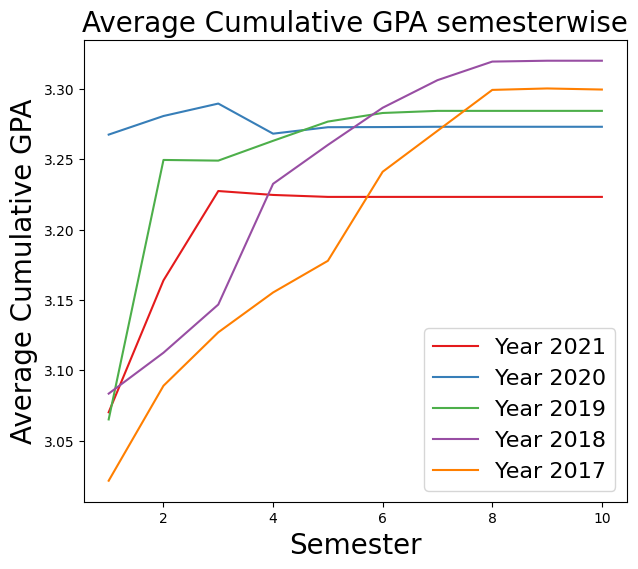

In [ ]:
cumulative_gpa_columns = ['Cumulative GPA-1st Sem', 'Cumulative GPA-2nd Sem', 'Cumulative GPA-3rd Sem',
                          'Cumulative GPA-4th Sem', 'Cumulative GPA-5th Sem', 'Cumulative GPA-6th Sem',
                          'Cumulative GPA-7th Sem', 'Cumulative GPA-8th Sem', 'Cumulative GPA-9th Sem',
                          'Cumulative GPA-10th Sem']

# Create a figure and axis object with specified figure size
fig, ax = plt.subplots(figsize=(7, 6))

# Plot the data for each dataframe in dfs
for i, df in enumerate(dfs):
    # Extract the relevant columns from the dataframe
    cumulative_gpa = [df[col].mean() for col in cumulative_gpa_columns]

    # Plot the data in a different color
    color = plt.cm.Set1(i)
    ax.plot(range(1, 11), cumulative_gpa, color=color, label=f'Year {2021-i}')

# Add labels and title
ax.set_xlabel('Semester', fontsize=20)
ax.set_ylabel('Average Cumulative GPA', fontsize=20)
ax.set_title('Average Cumulative GPA semesterwise', fontsize=20)

# Add legend
ax.legend(fontsize=16)

# Show the plot
plt.show()

